In [3]:
import numpy as np
import pandas as pd

In [4]:
train_data = pd.read_csv(r"C:\Users\91903\Documents\Insaid Studies\Github folder\Kaggle Competition\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bourke, Miss. Mary",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train_data.drop(['Ticket'], 1, inplace=True)

Dropping fare since it has high correlation with class

In [8]:
train_data.drop(['Fare'], 1, inplace=True)

In [9]:
#Dropping cabin as it has about 80% missing values
train_data.drop(['Cabin'], 1, inplace=True)

In [10]:
#Dropping name as it is not helping us)
train_data.drop(['Name'], 1, inplace= True)

In [11]:
#Dropping passenger id as it is not helping us)
train_data.drop(['PassengerId'], 1, inplace= True)

In [12]:
train_data[train_data.Embarked.isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [13]:
train_data.iloc[[61,829],:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [14]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan, strategy="most_frequent" )
train_data["Embarked"]=imp.fit_transform(train_data[["Embarked"]]).ravel()

In [15]:
train_data[train_data.Age.isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,C
863,0,3,female,NaN,8,2,S
868,0,3,male,NaN,0,0,S
878,0,3,male,NaN,0,0,S


In [16]:
train_data = pd.get_dummies(train_data, columns=['Sex'], drop_first= True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_male
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,0
2,1,3,26.0,0,0,S,0
3,1,1,35.0,1,0,S,0
4,0,3,35.0,0,0,S,1


In [17]:
#train_data.drop(['Sex_female'], 1, inplace= True)

In [18]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_male
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,0
2,1,3,26.0,0,0,S,0
3,1,1,35.0,1,0,S,0
4,0,3,35.0,0,0,S,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,1
887,1,1,19.0,0,0,S,0
888,0,3,NaN,1,2,S,0
889,1,1,26.0,0,0,C,1


In [19]:
train_data = pd.get_dummies(train_data, columns = ["Embarked"],drop_first=True)

In [20]:
train_data[train_data.Age.isnull()==True]

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
5,0,3,NaN,0,0,1,1,0
17,1,2,NaN,0,0,1,0,1
19,1,3,NaN,0,0,0,0,0
26,0,3,NaN,0,0,1,0,0
28,1,3,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...
859,0,3,NaN,0,0,1,0,0
863,0,3,NaN,8,2,0,0,1
868,0,3,NaN,0,0,1,0,1
878,0,3,NaN,0,0,1,0,1


In [21]:
from sklearn.impute import KNNImputer
# Retrieve the numpy array
values = train_data.values
values

array([[ 0.,  3., 22., ...,  1.,  0.,  1.],
       [ 1.,  1., 38., ...,  0.,  0.,  0.],
       [ 1.,  3., 26., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3., nan, ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 0.,  3., 32., ...,  1.,  1.,  0.]])

In [22]:
# Count the number of NaN values in each column
print('Missing: %d' % np.isnan(values).sum())

Missing: 177


In [23]:
# Define the imputer
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
# Transform the dataset
transformed_values = knn_imputer.fit_transform(values)
# Count the number of NaN values in each column
print('Missing: %d' % np.isnan(transformed_values).sum())

Missing: 0


In [24]:
transformed_values

array([[ 0.        ,  3.        , 22.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  3.        , 26.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  3.        , 21.33333333, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        , 26.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.        , 32.        , ...,  1.        ,
         1.        ,  0.        ]])

In [25]:
train_data_imputed = pd.DataFrame(data=transformed_values,columns=["Survived","Pclass","Age","SibSp","Parch","Sex_male","Embarked_Q","Embarked_S"] )
train_data_imputed.iloc[[5,17,19,26],:]

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
5,0.0,3.0,51.500000,0.0,0.0,1.0,1.0,0.0
17,1.0,2.0,31.666667,0.0,0.0,1.0,0.0,1.0
19,1.0,3.0,18.000000,0.0,0.0,0.0,0.0,0.0
26,0.0,3.0,27.833333,0.0,0.0,1.0,0.0,0.0


In [26]:
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']                # create a Python list of feature names
X = train_data_imputed[feature_cols]
Y = train_data_imputed["Survived"]

In [27]:
print(X.shape)
print(Y.shape)

(891, 7)
(891,)


In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

In [29]:
logreg.coef_

array([[-1.27918828e+00, -5.07915550e-02, -3.90812533e-01,
        -4.57364040e-02, -2.54443833e+00, -1.87452547e-03,
        -3.90038007e-01]])

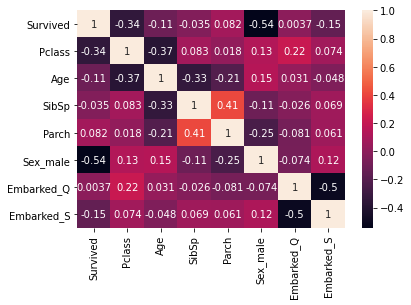

In [30]:
import seaborn as sns
sns.heatmap(train_data_imputed.corr(), annot=True );

In [31]:
test_data = pd.read_csv(r"C:\Users\91903\Documents\Insaid Studies\Github folder\Kaggle Competition\test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
test_data.drop(['Ticket'], 1, inplace=True)
test_data.drop(['Fare'], 1, inplace=True)
#Dropping cabin as it has about 80% missing values
test_data.drop(['Cabin'], 1, inplace=True)
#Dropping name as it is not helping us)
test_data.drop(['Name'], 1, inplace= True)
#Dropping passenger id as it is not helping us)
test_data.drop(['PassengerId'], 1, inplace= True)

In [33]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan, strategy="most_frequent" )
test_data["Embarked"]=imp.fit_transform(test_data[["Embarked"]]).ravel()

In [34]:
test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first= True)
test_data = pd.get_dummies(test_data, columns = ["Embarked"],drop_first=True)
test_data.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1
2,2,62.0,0,0,1,1,0
3,3,27.0,0,0,1,0,1
4,3,22.0,1,1,0,0,1


In [38]:
from sklearn.impute import KNNImputer
# Retrieve the numpy array
values = test_data.values
values
# Define the imputer
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
# Transform the dataset
transformed_values = knn_imputer.fit_transform(values)
# Count the number of NaN values in each column
print('Missing: %d' % np.isnan(transformed_values).sum())
test_data_imputed = pd.DataFrame(data=transformed_values,columns=["Pclass","Age","SibSp","Parch","Sex_male","Embarked_Q","Embarked_S"] )

Missing: 0


In [39]:
logreg.predict(test_data_imputed)

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.